In [1]:
import pandas as pd
import numpy as np
import time
import normet
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [2]:
df=pd.read_csv(r'data/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [8]:
automl=normet.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-07-04 12:02:31 : Training AutoML...
2024-07-04 12:03:31 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [9]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [10]:
automl.best_result

{'pred_time': 2.8282029858194133e-06,
 'wall_clock_time': 15.478726148605347,
 'metric_for_logging': {'pred_time': 2.8282029858194133e-06},
 'val_loss': 0.14506105728824534,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 3.0076282024383545}

In [11]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [12]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [13]:
mod_stats=(pd.concat([normet.modStats(df1a,automl,set='testing'),
                normet.modStats(df1a,automl,set='training'),
                normet.modStats(df1a.assign(set="all"),automl,set='all')]))

In [14]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [15]:
df1a

,rowid,u10,d2m,rh2m,v10,ssrd,t2m,blh,tcc,sp,value,tp,date,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,277.183465,91.884130,1.545010,-1.164153e-10,278.394725,384.209053,0.650958,102252.303312,58.1,0.000008,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-2.308789,276.695430,92.715877,1.282742,-1.164153e-10,277.772899,353.220263,0.603699,102211.168636,43.2,0.000002,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-2.216471,276.505662,93.485560,0.758730,-1.164153e-10,277.463419,255.911846,0.710378,102174.855967,43.0,0.000005,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.928623,276.412816,93.906363,0.509013,-1.164153e-10,277.305813,191.375560,0.837765,102166.786485,42.8,0.000005,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.700043,276.553051,93.696878,0.607069,-1.164153e-10,277.478941,151.780210,0.819103,102142.578039,36.8,0.000003,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,272.197565,90.582979,-1.945195,-5.820766e-11,273.557442,476.945688,0.918149,99902.506413,11.7,0.000000,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.987925,272.171041,89.939908,-2.102732,-5.820766e-11,273.629146,486.665851,0.839639,99947.625909,11.0,0.000000,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.681543,272.087408,90.422188,-1.933668,-5.820766e-11,273.470592,489.355002,0.739354,100000.215520,15.3,0.000000,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,1.020793,272.235319,95.088677,-0.583816,-5.820766e-11,272.926062,40.714872,0.643753,100042.844978,17.1,0.000000,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [16]:
start_time = time.time()
df_dew=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-04 12:03:31 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:03:41 : Aggregating 1000 predictions...
Execution time: 9.66 seconds


In [17]:
start_time = time.time()
df_dew1=normet.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-04 12:03:41 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:03:44 : Aggregating 300 predictions...
Execution time: 2.67 seconds


In [18]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [19]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [20]:
start_time = time.time()
df_dew2=normet.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-04 12:03:44 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:03:46 : Aggregating 300 predictions...
Execution time: 2.26 seconds


<Axes: xlabel='date'>

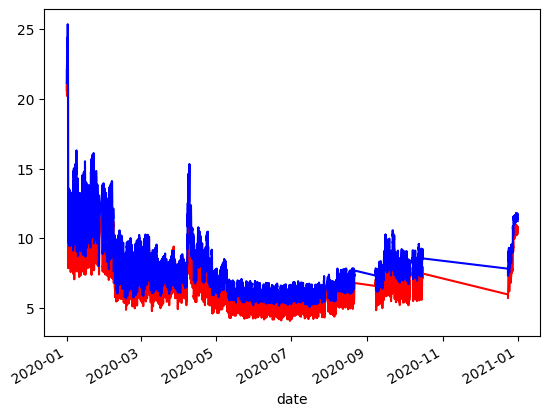

In [21]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [22]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'r2', #
}

In [23]:
df1a.columns

Index(['rowid', 'u10', 'd2m', 'rh2m', 'v10', 'ssrd', 't2m', 'blh', 'tcc', 'sp',
       'value', 'tp', 'date', 'date_unix', 'day_julian', 'weekday', 'hour',
       'set'],
      dtype='object')

In [24]:
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-04 12:03:46 : Training AutoML...
2024-07-04 12:04:47 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-04 12:04:47 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:04:48 : Aggregating 100 predictions...


In [25]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-04 12:04:48 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:04:49 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-07-04 12:04:49 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:04:49 : Aggregating 100 predictions...


<Axes: xlabel='date'>

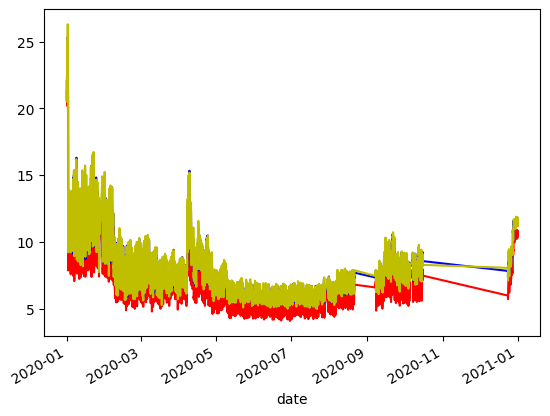

In [27]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')
df_dew['normalised'].plot(c='y')

In [28]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
1,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
2,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [29]:
df_dew, mod_stats=normet.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-07-04 12:05:52 : Progress: 20.00% (Model 1/5)... ETA: 4.14 minutes
2024-07-04 12:07:11 : Progress: 40.00% (Model 2/5)... ETA: 3.54 minutes
2024-07-04 12:08:14 : Progress: 60.00% (Model 3/5)... ETA: 2.27 minutes
2024-07-04 12:09:32 : Progress: 80.00% (Model 4/5)... ETA: 1.18 minutes
2024-07-04 12:10:32 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [30]:
#Resampling from given dataset
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-07-04 12:10:32 : Training AutoML...
2024-07-04 12:11:33 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-04 12:11:33 : Normalising the dataset using the trained model in parallel.
2024-07-04 12:11:36 : Aggregating 300 predictions...


In [31]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,22.036427
2020-01-01 01:00:00,43.2,20.604290
2020-01-01 02:00:00,43.0,20.541487
2020-01-01 03:00:00,42.8,20.982031
2020-01-01 04:00:00,36.8,20.209471


# Time series decomposition

In [32]:
df_dewca, mod_stats=normet.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-07-04 12:11:36 : Training AutoML...
2024-07-04 12:12:36 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-04 12:12:36 : Subtracting base...
2024-07-04 12:12:39 : Subtracting date_unix... ETA: 11.40 seconds
2024-07-04 12:12:42 : Subtracting day_julian... ETA: 8.19 seconds
2024-07-04 12:12:45 : Subtracting weekday... ETA: 5.41 seconds
2024-07-04 12:12:47 : Subtracting hour... ETA: 2.68 seconds


In [33]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.818041,20.604118,1.449459,0.553579,-0.750149,22.521753,0.664746
2020-01-01 01:00:00,43.2,9.692105,21.145397,1.942423,0.545198,-0.448908,23.722921,0.538811
2020-01-01 02:00:00,43.0,8.911392,21.416718,1.732838,0.660833,-0.588243,22.980244,-0.241902
2020-01-01 03:00:00,42.8,8.811673,21.317305,1.873583,0.566668,-0.807030,22.608904,-0.341621
2020-01-01 04:00:00,36.8,8.689767,21.724403,1.793306,0.571714,-0.710558,22.915339,-0.463528
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.585531,11.187433,1.018248,0.065087,0.030320,11.733325,-0.567763
2020-12-31 20:00:00,11.0,10.310694,9.855659,0.788847,0.049502,-0.077022,11.774386,1.157399
2020-12-31 21:00:00,15.3,8.988753,10.415834,1.015028,0.096924,-0.112138,11.251107,-0.164541


In [34]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-04 12:12:50 : Subtracting base...
2024-07-04 12:12:52 : Subtracting date_unix... ETA: 10.73 seconds
2024-07-04 12:12:55 : Subtracting day_julian... ETA: 7.97 seconds
2024-07-04 12:12:58 : Subtracting weekday... ETA: 5.31 seconds
2024-07-04 12:13:00 : Subtracting hour... ETA: 2.64 seconds


In [35]:
df_dewcb, mod_stats=normet.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-04 12:13:03 : Training AutoML...
2024-07-04 12:14:03 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-04 12:14:04 : Subtracting deweathered...
2024-07-04 12:14:06 : Subtracting blh... ETA: 26.09 seconds
2024-07-04 12:14:09 : Subtracting u10... ETA: 23.09 seconds
2024-07-04 12:14:11 : Subtracting d2m... ETA: 20.13 seconds
2024-07-04 12:14:13 : Subtracting sp... ETA: 17.28 seconds
2024-07-04 12:14:16 : Subtracting v10... ETA: 14.58 seconds
2024-07-04 12:14:18 : Subtracting t2m... ETA: 11.93 seconds
2024-07-04 12:14:20 : Subtracting tp... ETA: 9.41 seconds
2024-07-04 12:14:22 : Subtracting tcc... ETA: 6.94 seconds
2024-07-04 12:14:24 : Subtracting ssrd... ETA: 4.55 seconds

In [36]:
df_dewcb, mod_stats=normet.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-04 12:14:28 : Subtracting deweathered...
2024-07-04 12:14:30 : Subtracting blh... ETA: 26.35 seconds
2024-07-04 12:14:33 : Subtracting u10... ETA: 22.99 seconds
2024-07-04 12:14:35 : Subtracting d2m... ETA: 20.03 seconds
2024-07-04 12:14:38 : Subtracting sp... ETA: 17.18 seconds
2024-07-04 12:14:40 : Subtracting v10... ETA: 14.50 seconds
2024-07-04 12:14:42 : Subtracting t2m... ETA: 11.98 seconds
2024-07-04 12:14:44 : Subtracting tp... ETA: 9.42 seconds
2024-07-04 12:14:46 : Subtracting tcc... ETA: 6.97 seconds
2024-07-04 12:14:48 : Subtracting ssrd... ETA: 4.57 seconds
2024-07-04 12:14:50 : Subtracting rh2m... ETA: 2.25 seconds


In [37]:
df_dewcb

,observed,deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,22.521753,3.105356,15.690435,13.370102,3.032124,6.203915,5.311699,2.730858,1.852100,0.520401,0.291279,9.400610
2020-01-01 01:00:00,43.2,23.722921,1.032499,10.332563,10.146141,3.130753,5.301819,4.798836,2.912220,2.052608,1.157616,-0.196972,-0.640710
2020-01-01 02:00:00,43.0,22.980244,0.215631,6.851231,8.113451,3.094269,4.130383,4.713776,3.276894,2.710617,2.732285,1.285332,1.364532
2020-01-01 03:00:00,42.8,22.608904,-0.558086,5.456263,8.559235,3.648994,3.184381,4.667519,3.397984,2.791050,3.348179,1.633690,1.993581
2020-01-01 04:00:00,36.8,22.915339,-0.296980,1.798401,4.787289,3.438236,1.801090,3.431309,2.871231,1.892057,2.969601,2.141823,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.733325,-0.629538,-0.715612,-0.015411,0.308806,0.392364,0.891096,0.799346,-0.003299,-0.062504,-0.241484,-0.272833
2020-12-31 20:00:00,11.0,11.774386,-0.537662,-0.538769,-0.091031,0.148932,0.305520,0.786525,0.761405,-0.405293,-0.437243,-0.193840,-0.571940
2020-12-31 21:00:00,15.3,11.251107,-0.243903,-0.258332,0.046582,0.338228,0.362024,0.831674,0.803146,-0.466408,-0.422866,-0.049072,3.652803


In [38]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-04 12:14:52 : Subtracting base...
2024-07-04 12:14:55 : Subtracting date_unix... ETA: 10.64 seconds
2024-07-04 12:14:57 : Subtracting day_julian... ETA: 8.06 seconds
2024-07-04 12:15:00 : Subtracting weekday... ETA: 5.31 seconds
2024-07-04 12:15:03 : Subtracting hour... ETA: 2.64 seconds


In [39]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.635087,20.808069,1.449459,0.553579,-0.750149,22.521753,0.460794
2020-01-01 01:00:00,43.2,9.427952,21.430550,1.942423,0.545198,-0.448908,23.722921,0.253659
2020-01-01 02:00:00,43.0,9.077608,21.271500,1.732838,0.660833,-0.588243,22.980244,-0.096684
2020-01-01 03:00:00,42.8,8.548481,21.601494,1.873583,0.566668,-0.807030,22.608904,-0.625812
2020-01-01 04:00:00,36.8,8.893300,21.541868,1.793306,0.571714,-0.710558,22.915339,-0.280993
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.192358,10.601604,1.018248,0.065087,0.030320,11.733325,0.018065
2020-12-31 20:00:00,11.0,9.905566,10.281785,0.788847,0.049502,-0.077022,11.774386,0.731274
2020-12-31 21:00:00,15.3,8.519252,10.906334,1.015028,0.096924,-0.112138,11.251107,-0.655041


# Rolling weather normalisation

In [40]:
df_dewc1, mod_stats=normet.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-07-04 12:15:06 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-04 12:15:08 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 7.84 seconds
2024-07-04 12:15:11 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 5.14 seconds
2024-07-04 12:15:14 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 2.45 seconds


In [41]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.412506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.619698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,16.589432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,16.524757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.865799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

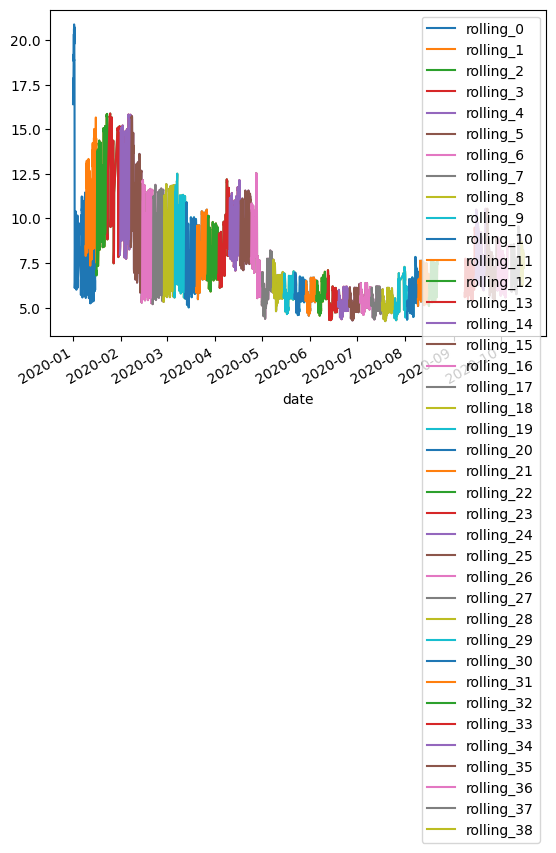

In [42]:
df_dewc1.iloc[:,1:].plot()

In [43]:
df_dewc2, mod_stats=normet.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321)

2024-07-04 12:15:18 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-04 12:15:21 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 7.85 seconds
2024-07-04 12:15:23 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 5.16 seconds
2024-07-04 12:15:26 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 2.46 seconds


In [44]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,22.331083,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.972191,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,22.342634,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,22.705828,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.325943,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

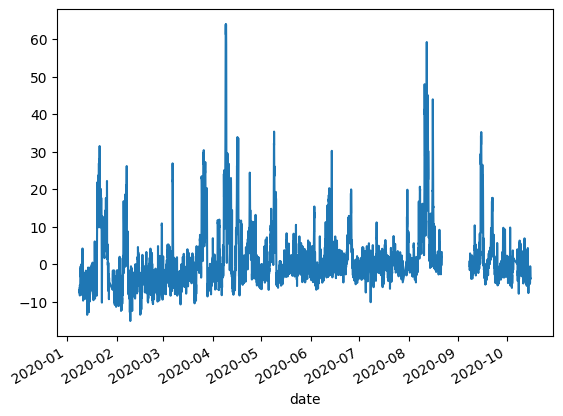

In [45]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

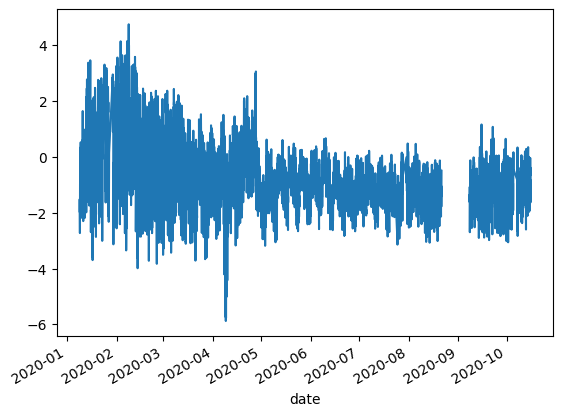

In [46]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [47]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [48]:
df1a

,rowid,u10,d2m,rh2m,v10,ssrd,t2m,blh,tcc,sp,value,tp,date,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,277.183465,91.884130,1.545010,-1.164153e-10,278.394725,384.209053,0.650958,102252.303312,58.1,0.000008,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-2.308789,276.695430,92.715877,1.282742,-1.164153e-10,277.772899,353.220263,0.603699,102211.168636,43.2,0.000002,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-2.216471,276.505662,93.485560,0.758730,-1.164153e-10,277.463419,255.911846,0.710378,102174.855967,43.0,0.000005,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.928623,276.412816,93.906363,0.509013,-1.164153e-10,277.305813,191.375560,0.837765,102166.786485,42.8,0.000005,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.700043,276.553051,93.696878,0.607069,-1.164153e-10,277.478941,151.780210,0.819103,102142.578039,36.8,0.000003,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,272.197565,90.582979,-1.945195,-5.820766e-11,273.557442,476.945688,0.918149,99902.506413,11.7,0.000000,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.987925,272.171041,89.939908,-2.102732,-5.820766e-11,273.629146,486.665851,0.839639,99947.625909,11.0,0.000000,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.681543,272.087408,90.422188,-1.933668,-5.820766e-11,273.470592,489.355002,0.739354,100000.215520,15.3,0.000000,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,1.020793,272.235319,95.088677,-0.583816,-5.820766e-11,272.926062,40.714872,0.643753,100042.844978,17.1,0.000000,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [49]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp_all(automl,df1a,feature_names=all_features)

In [50]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088
